In [50]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
def get_status(status):
    if isinstance(status, float) and np.isnan(status):
        return np.nan

    if status.lower().find("deceased") != -1:
        return "Deceased"
    else:
        return "Alive"

Breaking Bad

In [52]:
meta = pd.read_csv("series-networks/meta.csv")
br_edgelist = pd.read_csv("series-networks/breakingbad/edges.csv")
br_attr = pd.read_csv("series-networks/breakingbad/attributes.csv")

In [53]:
br_attr["status"].unique()

array(['Alive', 'Unknown', 'Deceased', nan, 'Alive (disabled)',
       'Disbanded', 'Alive (both)', 'Alive (Incarcerated for 86 years)',
       'Alive (Fled to Alaska with a new identity)',
       'Alive (incarcerated)', 'Alive (in custody; presumed)',
       '1 (deceased) 2 (deceased) 3 (alive)', 'Alive (presumably)'],
      dtype=object)

In [54]:
# Don't include not character nodes (e.g. Characters page in fandom) and several characters for which no data is available
br_attr = br_attr[br_attr["name"].notna()]

In [66]:
br_attr["status_1"] = br_attr["status"].apply(get_status)

# Drop 14 nans
br_attr = br_attr.dropna(subset=["status_1"])

br_g =  nx.from_pandas_edgelist(br_edgelist, "from", "to")
br_attr["eigen_cent"] = br_attr["id"].map(pd.Series(nx.eigenvector_centrality(br_g)))

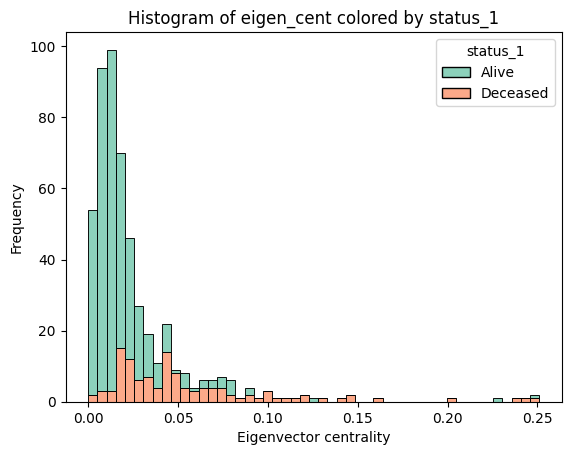

In [89]:
sns.histplot(data=br_attr, x='eigen_cent', hue='status_1', multiple='stack', palette='Set2')
plt.title('Histogram of eigen_cent colored by status_1')
plt.xlabel('Eigenvector centrality')
plt.ylabel('Frequency')
plt.show()

In [85]:
br_attr_upper = br_attr[br_attr["eigen_cent"] >= br_attr["eigen_cent"].quantile(0.5)]

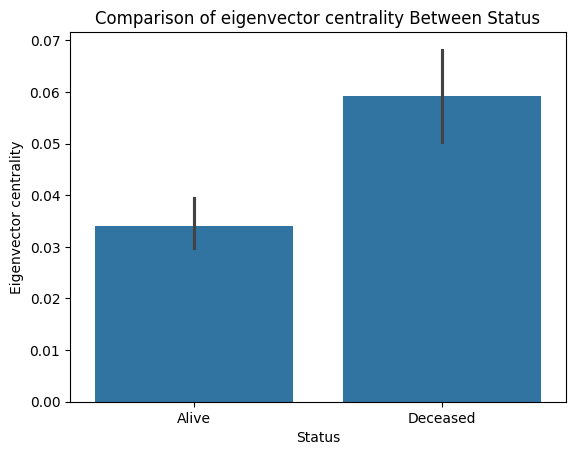

In [87]:
sns.barplot(x="status_1", y="eigen_cent", data=br_attr_upper)
plt.title('Comparison of eigenvector centrality Between Status')
plt.xlabel('Status')
plt.ylabel('Eigenvector centrality')
plt.show()

The Wire

In [137]:
w_edgelist = pd.read_csv("series-networks/thewire/edges.csv")
w_attr = pd.read_csv("series-networks/thewire/attributes.csv")

In [140]:
len(w_attr[w_attr["death"].notna()])
# 41 dead out of 289

289

In [145]:
w_attr = w_attr[w_attr["name"].notna()]
# 9 observations excluded due to not having name variable

In [146]:
# No status variable
# status_1 is based on whether death variable is notna
w_attr["status_1"] = w_attr["death"].apply(lambda x: "Deceased" if pd.notna(x) else "Alive")

w_g = nx.from_pandas_edgelist(w_edgelist, "from", "to")
w_attr["eigen_cent"] = w_attr["id"].map(pd.Series(nx.eigenvector_centrality(w_g)))

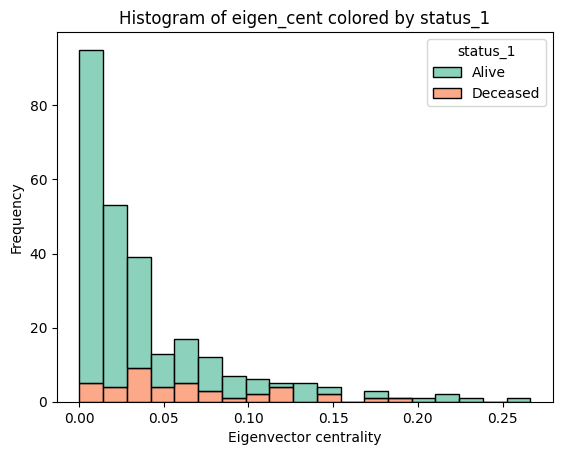

In [147]:
sns.histplot(data=w_attr, x='eigen_cent', hue='status_1', multiple='stack', palette='Set2')
plt.title('Histogram of eigen_cent colored by status_1')
plt.xlabel('Eigenvector centrality')
plt.ylabel('Frequency')
plt.show()

In [150]:
w_attr_upper = w_attr[w_attr["eigen_cent"] >= w_attr["eigen_cent"].quantile(0.5)]

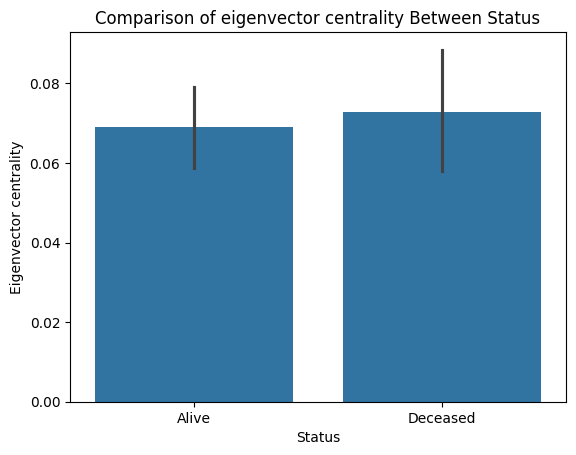

In [151]:
sns.barplot(x="status_1", y="eigen_cent", data=w_attr_upper)
plt.title('Comparison of eigenvector centrality Between Status')
plt.xlabel('Status')
plt.ylabel('Eigenvector centrality')
plt.show()

Avatar

In [90]:
a_edgelist = pd.read_csv("series-networks/avatar/edges.csv")
a_attr = pd.read_csv("series-networks/avatar/attributes.csv")

In [97]:
a_attr["death"].unique()
len(a_attr[a_attr["death"].notna()])
# 67 deaths in the series -> is this accurate?
a_attr

,id,name,nationality,ethnicity,hair,gender,allies,enemies,position,affiliation,appearance,alias,nickname,age,birth,death,eyes,skincolor,loveinterest,weapon,fightingstyle,profession,pred,success,lastappearance,voice,actor,residence,height,skintype,reign,pronouns,image,headquarters,purpose
0,46th_Earth_King,46th Earth King,"Ba Sing Se, Earth Kingdom",Earth Kingdom,White,Man,"Royal Earthbender Guards, Earth Kingdom","Chin the Conqueror, Chin's army, peasants of B...",Earth King,Earth KingdomHou-Ting dynasty,Escape from the Spirit World (only appearance),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aang,安昂[2] Aang,Southern Air Temple,Air Nomad,Dark brown (typically shaved),Man,"Team Avatar, Iroh, King Bumi, Gyatso, Hakoda, ...","Azula, Ozai, Zhao, Combustion Man, Long Feng, ...",Co-founder of the United Republic of NationsFu...,Air AcolytesAir NomadsTeam Avatar,"""The Boy in the Iceberg""",Bonzu Pippinpaddleopsicopolis IIIKuzon (while ...,Aangy (by Koko)Sweetie (by Katara)Twinkle Toes...,112 (biologically 12) in Avatar: The Last Airb...,12 BG,Spring 100 AG (revived by Katara using spirit ...,Gray,Light,Katara (wife),"The elements, glider staff","Airbending, waterbending (Northern and Souther...",Air Nomad culture teacherAirbending instructor...,Roku (as the Avatar),Korra (as the Avatar),"""Lost and Found""",Zach Tyler Eisen (in Avatar: The Last Airbende...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Netflix:Aang,Aang,NaN,Air Nomad,NaN,Man,"Katara, Sokka, Appa, Momo, more ...","Fire Nation, Zuko, Ozai, more ...",NaN,Air Nomads,NaN,NaN,NaN,12[1],NaN,NaN,Brown,NaN,NaN,NaN,Airbending,Avatar,NaN,NaN,NaN,NaN,Gordon Cormier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aang_(games),Aang,Southern Air Temple,Air Nomad,Black (usually shaven),Man,"Gyatso, Team Avatar, Iroh, Bumi, past Avatars,...","Ozai, Azula, Zhao, Long Feng, the Dai Li, Comb...",Fully realized Avatar,Air NomadsTeam Avatar,Avatar: The Last Airbender (video game),NaN,NaN,112 (biologically 12),NaN,NaN,NaN,NaN,NaN,"The elements, glider staff","Airbending, waterbending, earthbending, firebe...","Avatar, monk",NaN,NaN,Avatar: The Last Airbender – Into the Inferno,Zachary Tyler Eisen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aang_(pilot),安昂 Aang,"Southern Air Temple, Air Nomads",Air Nomad,Black (typically shaven),Man,"Kya, Sokka","Zuko, Fire Nation",Avatar-in-training,Air NomadsTeam Avatar,Unaired pilot (only appearance),NaN,NaN,112 (biologically 12 in Avatar: The Last Airbe...,12 BG,NaN,NaN,NaN,NaN,"Air, glider staff","Airbending, Avatar State",AvatarMonk,NaN,NaN,NaN,Mitchel Musso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,Zongying,Zongying,Earth Kingdom,NaN,Gray,Woman,"Pakku, Bumi, Iroh",NaN,Director of the Ba Sing Se Players,NaN,Avatar: The Last Airbender: Quest for Balance ...,NaN,NaN,NaN,NaN,NaN,NaN,Light,NaN,NaN,NaN,Theater director,NaN,NaN,NaN,Michelle Wong,NaN,"Ba Sing Se, Earth Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,Zoryu,Zoryu,"Fire Nation Capital, Fire Nation",Fire Nation,NaN,Man,"Dairin, Keohso clan, Hei-Ran, Rangi, Kyoshi, C...","Yun, Huazo, Chaejin, Saowon clan, Lao Ge",Fire Lord,Fire NationFire Nation Royal Family,"""Ancient History""",NaN,NaN,"""Young"" in The Shadow of Kyoshi[1][2]",NaN,NaN,NaN,NaN,NaN,Fire,Firebending,NaN,Chaeryu (as Fire Lord),"Unknown, eventually Sozin's father (as Fire Lord)",Epilogue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,Zuko,祖寇 [2]蘇科 [3] Zuko,"Fire Nation Capital, Fire Nation",Fire Nation,Dark brown/black (white in old age),Man,"Team Avatar, Mai, Ty Lee, Hakoda, Jin, June, F...","Azula, Ozai, Azulon, Jet, Combustion Man, Zhao...",Ambassador[9]Co-founder of the United Republic...,Fire NationFire Nation Royal FamilyTeam Avatar,"""The Boy in the Iceberg""",The Blue Spirit (while masked as such)Lee (whi...,Zuzu (by Azula and Kiyi)Sifu Hotman (by Aang),16 in Avatar: T

In [100]:
a_attr[a_attr["name"].isna()]
# No observations without name variable
# TODO some other way to filter out non-character observations?

,id,name,nationality,ethnicity,hair,gender,allies,enemies,position,affiliation,appearance,alias,nickname,age,birth,death,eyes,skincolor,loveinterest,weapon,fightingstyle,profession,pred,success,lastappearance,voice,actor,residence,height,skintype,reign,pronouns,image,headquarters,purpose


In [124]:
# No status variable
# status_1 is based on whether death variable is notna
a_attr["status_1"] = a_attr["death"].apply(lambda x: "Deceased" if pd.notna(x) else "Alive")

a_g = nx.from_pandas_edgelist(a_edgelist, "from", "to")
a_attr["eigen_cent"] = a_attr["id"].map(pd.Series(nx.eigenvector_centrality(a_g)))

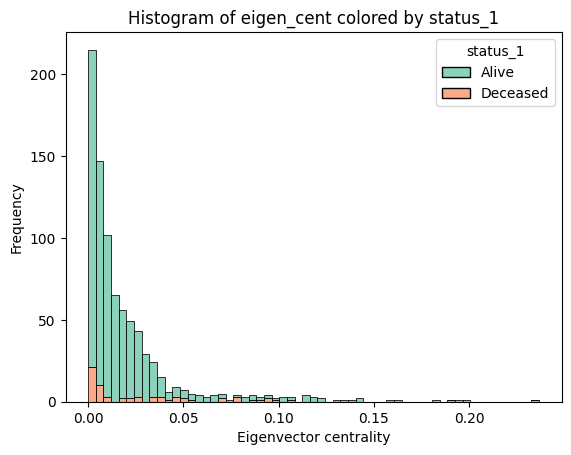

In [125]:
sns.histplot(data=a_attr, x='eigen_cent', hue='status_1', multiple='stack', palette='Set2')
plt.title('Histogram of eigen_cent colored by status_1')
plt.xlabel('Eigenvector centrality')
plt.ylabel('Frequency')
plt.show()

In [127]:
a_attr_upper = a_attr[a_attr["eigen_cent"] >= a_attr["eigen_cent"].quantile(0.5)]

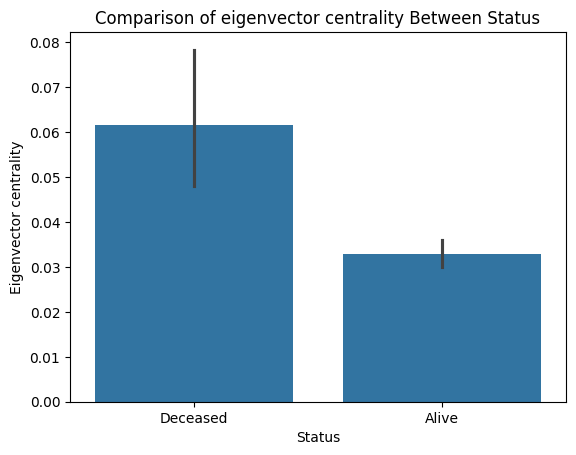

In [128]:
sns.barplot(x="status_1", y="eigen_cent", data=a_attr_upper)
plt.title('Comparison of eigenvector centrality Between Status')
plt.xlabel('Status')
plt.ylabel('Eigenvector centrality')
plt.show()

Sopranos

In [57]:
s_edgelist = pd.read_csv("series-networks/sopranos/edges.csv")
s_attr = pd.read_csv("series-networks/sopranos/attributes.csv")

In [58]:
# Don't include not character nodes (e.g. Characters page in fandom) and several characters for which no data is available
s_attr = s_attr[s_attr["name"].notna()]
# Lost 17 observations

In [45]:
pd.set_option('display.max_columns', None)
s_attr
s_attr["status"].unique()

array(['Alive', 'Deceased', nan, 'Unknown',
       'Deceased (shot to death), August 2006, New York', 'All Alive',
       '1 (alive)2 (deceased)3 (alive)4 (alive)5 (deceased)',
       'Alive (as of 2007)', 'Alive (both)',
       'Comatose (multiple gunshot wounds outside of the Bada-Bing/Presumably Deceased but not confirmed)',
       'Unknown (presumably deceased)'], dtype=object)

In [63]:
s_attr["status_1"] =  s_attr["status"].apply(get_status)

# Drop 22 nans
s_attr = s_attr.dropna(subset=["status_1"])

s_g = nx.from_pandas_edgelist(s_edgelist, "from", "to")
s_attr["eigen_cent"] = s_attr["id"].map(pd.Series(nx.eigenvector_centrality(s_g)))

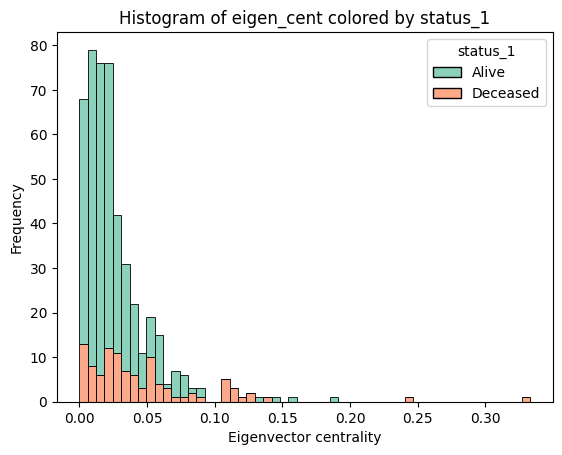

In [84]:
sns.histplot(data=s_attr, x='eigen_cent', hue='status_1', multiple='stack', palette='Set2')
plt.title('Histogram of eigen_cent colored by status_1')
plt.xlabel('Eigenvector centrality')
plt.ylabel('Frequency')
plt.show()

In [82]:
s_attr_upper = s_attr[s_attr["eigen_cent"] >= s_attr["eigen_cent"].quantile(0.5)]

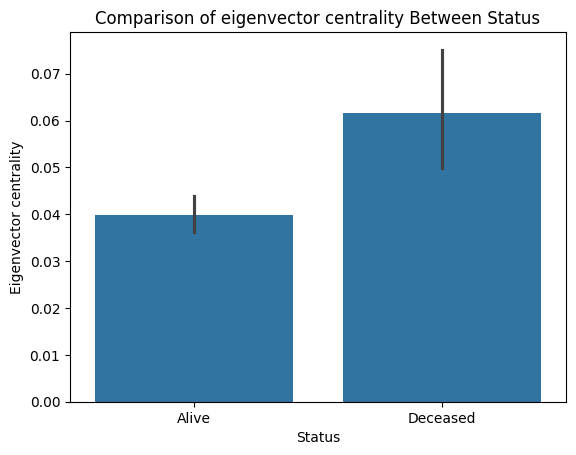

In [83]:
sns.barplot(x="status_1", y="eigen_cent", data=s_attr_upper)
plt.title('Comparison of eigenvector centrality Between Status')
plt.xlabel('Status')
plt.ylabel('Eigenvector centrality')
plt.show()

Game of Thrones

In [114]:
got_edgelist = pd.read_csv("series-networks/gameofthrones/edges.csv")
got_attr = pd.read_csv("series-networks/gameofthrones/attributes.csv")

In [120]:
len(got_attr[got_attr["death"].notna()])
got_attr

,id,title,image,birth,death,house,affiliation,titles,culture,father,mother,series,season,appearances,first,last,deathep,actor,spouse,religion,issue,aka,arms,species,lovers,siblings,family
0,Aemon,Aemon,NaN,"Aemon Targaryen[1]202 AC[a]Red Keep, King's La...","302 AC[c] (aged 100)Castle Black, the Gift[2]",Targaryen[1] (renounced),Order of Maesters[3]Night's Watch[3],Prince[1] (formerly)Maester[3],Valyrian[1],{Maekar I Targaryen}[1],{Dyanna Dayne}[2],Game of Thrones,1 · 3 · 4 · 5,11 episodes (see below),"""Lord Snow""","""The Gift""","""The Gift""",Peter Vaughan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aggar,Aggar,NaN,NaN,"299 AC[a]Winterfell, the North[1]",NaN,House Greyjoy[1],NaN,Ironborn[1],NaN,NaN,Game of Thrones,2,"""Valar Morghulis""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aggo_(The_North_Remembers),Aggo,NaN,NaN,NaN,NaN,{Drogo}[1]House Targaryen[1],Bloodrider[1],Dothraki[1],NaN,NaN,Game of Thrones,2,"""The North Remembers""",NaN,NaN,NaN,Niccolai McKinsky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aggo_(The_Red_Woman),Aggo,NaN,NaN,"303 AC[a]Vaes Dothrak, Dothraki Sea[1]",NaN,{Moro}[1],NaN,Dothraki[2],NaN,NaN,Game of Thrones,6,2 episodes (see below),"""The Red Woman""","""Book of the Stranger""","""Book of the Stranger""",Chuku Modu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alanna,Alanna,NaN,NaN,"305 AC[a]King's Landing, the Crownlands[1]",NaN,NaN,NaN,NaN,NaN,NaN,Game of Thrones,8,"""The Bells"" (corpse)",NaN,NaN,NaN,Kim Chapman,Husband[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Ygritte,Ygritte,NaN,Beyond the Wall,301 AC[a] at Castle BlackShot in the back with...,NaN,{Mance Rayder},NaN,Free Folk,NaN,NaN,Game of Thrones,2 · 3 · 4,17 episodes (see below),"""The Old Gods and the New""","""The Children"" (corpse)","""The Watchers on the Wall""",Rose Leslie,NaN,Old Gods of the Forest,NaN,NaN,NaN,NaN,Jon Snow,NaN,NaN
590,Yoren,Yoren,NaN,NaN,299 AC[a] near HarrenhalStabbed in the back of...,NaN,Night's Watch,NaN,NaN,NaN,NaN,Game of Thrones,1 · 2,7 episodes (see below),"""Lord Snow""","""What Is Dead May Never Die""","""What Is Dead May Never Die""",Francis Magee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{Brother},NaN
591,Yunkai%27i_whore,Yunkai'i whore,NaN,NaN,NaN,NaN,Wise Masters (slave),NaN,NaN,NaN,NaN,Game of Thrones,3,"""Second Sons""",NaN,NaN,NaN,Talitha Luke-Eardley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,Zalla,Zalla,NaN,298 AC[a] in Meereen,301 AC[b] (aged 3) in MeereenBurned alive by D...,NaN,NaN,NaN,Ghiscari (Meereenese),Goatherd,NaN,Game of Thrones,4,"""The Children"" (corpse)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# TODO no name variable -> how to do filtering of non-character observations?

In [133]:
# No status variable
# status_1 is based on whether death variable is notna
got_attr["status_1"] = got_attr["death"].apply(
    lambda x: "Deceased" if pd.notna(x) else "Alive"
)

got_g = nx.from_pandas_edgelist(got_edgelist, "from", "to")
got_attr["eigen_cent"] = got_attr["id"].map(pd.Series(nx.eigenvector_centrality(got_g)))

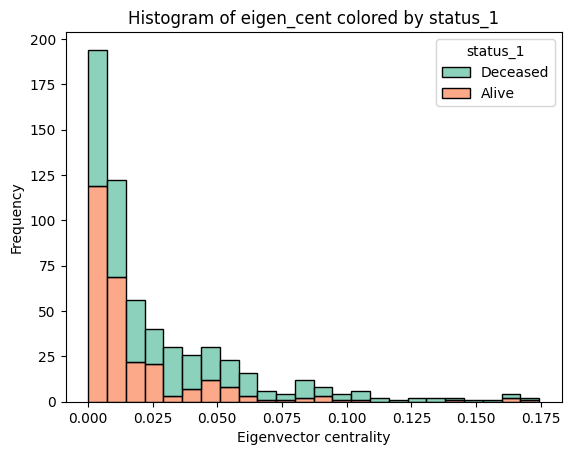

In [134]:
sns.histplot(data=got_attr, x='eigen_cent', hue='status_1', multiple='stack', palette='Set2')
plt.title('Histogram of eigen_cent colored by status_1')
plt.xlabel('Eigenvector centrality')
plt.ylabel('Frequency')
plt.show()

In [135]:
got_attr_upper = got_attr[got_attr["eigen_cent"] >= got_attr["eigen_cent"].quantile(0.5)]

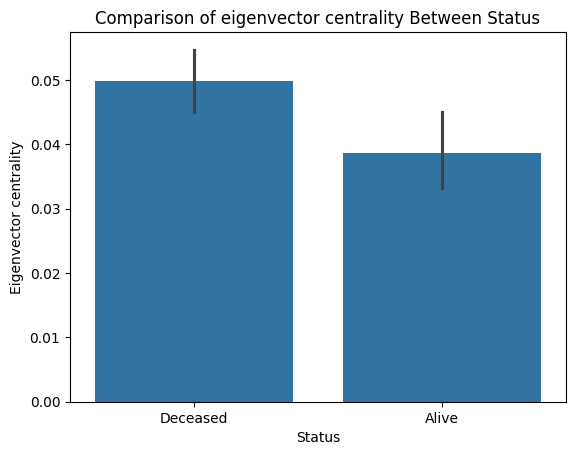

In [136]:
sns.barplot(x="status_1", y="eigen_cent", data=got_attr_upper)
plt.title("Comparison of eigenvector centrality Between Status")
plt.xlabel("Status")
plt.ylabel("Eigenvector centrality")
plt.show()

Joining these together

In [188]:
df_list = [br_attr_upper, a_attr_upper, w_attr_upper, got_attr_upper, s_attr_upper]
df_titles = ["Breaking Bad", "Avatar", "The Wire", "Game of Thrones", "Sopranos"]

for i, df in enumerate(df_list):
    df_copy = df.copy()
    df_copy["series"] = df_titles[i]
    df_list[i] = df_copy[["series", "status_1", "eigen_cent"]]

df_conc = pd.concat(df_list)

df_conc = df_conc.groupby(["series", "status_1"])["eigen_cent"].mean().reset_index()

series           status_1
Avatar           Alive       0.032822
                 Deceased    0.061610
Breaking Bad     Alive       0.034088
                 Deceased    0.059264
Game of Thrones  Alive       0.038643
                 Deceased    0.049836
Sopranos         Alive       0.039876
                 Deceased    0.061676
The Wire         Alive       0.068951
                 Deceased    0.072720
Name: eigen_cent, dtype: float64

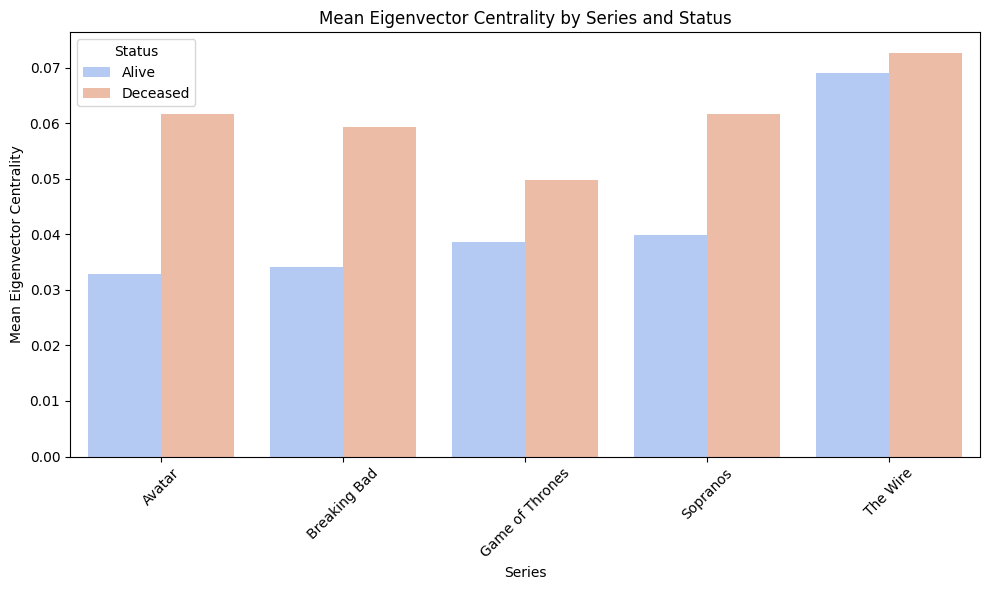

In [195]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="series", y="eigen_cent", hue="status_1", data=df_conc, palette="coolwarm"
)
plt.title("Mean Eigenvector Centrality by Series and Status")
plt.xlabel("Series")
plt.ylabel("Mean Eigenvector Centrality")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.tight_layout()

# plt.savefig("dead-importance.png")

plt.show()

Kiszedni az alsó részét eigen szerint

Probléma az egésszel: csak olyanokra töltik fel a fandomot, akik fontosak -> aki nem fontos, nem rakják be hogy meghalt

In [198]:
meta.sort_values(by="imdb-score", ascending=False)

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos
23,breakingbad,560.0,3682.0,22,Breaking Bad,9.5,2103195,Breaking Bad Wiki,tv,2K,8K,1K
12,avatar,845.0,8186.0,35,Avatar: The Last Airbender,9.3,355831,Avatar Wiki,tv,10K,10K,100
47,thewire,289.0,1630.0,15,The Wire,9.3,371996,The Wire,tv,700,600,10
21,gameofthrones,594.0,10591.0,27,Game of Thrones,9.2,2256479,Wiki of Westeros,tv,5K,10K,1K
25,sopranos,529.0,3687.0,51,The Sopranos,9.2,460732,The Sopranos Wiki,tv,1K,2K,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34,riverdale,372.0,3819.0,24,Chilling Adventures of Sabrina,7.4,107109,Archieverse Wiki,tv,1K,30K,1K
111,sexandthecity,53.0,77.0,28,Sex and the City,7.3,140889,Sex and the City Wiki,tv,200,400,10
82,twoandahalfmen,145.0,313.0,18,Two and a Half Men,7.1,278348,Two and a Half Men Wiki,tv,700,1K,10
68,glee,204.0,2752.0,45,Glee,6.8,154733,Glee Wiki,tv,1K,200K,20K
